# Adjusting Graphs for Final Paper

This notebook adjusts two images for the paper submission. Much of it was copied from the previous notebook. The first graph: "Nitrogen vs Excess Green minus Red" changes the nitrogen scale from percent to g/kg. It also changes the y-axis to not start at 0. The second graph: "Carbon:Nitrogen vs Excess Green minus Red" just changes the y-axis to not start at 0.

Luke Rosen

11/25/2023

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import pandas as pd
import os
import numpy as np
from datetime import datetime , timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from scipy import stats
import warnings

In [2]:
## Ignore warnings
warnings.filterwarnings("ignore")

In [3]:
if not os.path.exists("./graphs/"):
    os.mkdir("./graphs/")
graph_out = "./graphs/"     

## Harvest Metrics

In [4]:
Bio_Data = pd.read_excel("Oat-Clover_Plot_Map_and_Datasheet.xlsx")

In [5]:
Oat_Data = pd.read_csv("Oat_Data.csv")

In [6]:
Harvest = Oat_Data[(Oat_Data["Date_Index"]== 20211025)].reset_index(drop = True)  ##Separates the last date. 

In [7]:
Harvest

,Image,Plot,Date_Index,Date,Variety,Cover,Green_Avg,EXG_Avg_Image,EXGR_Avg_Image,GLI_Avg_Image,...,EXG_Global_Thresh,EXGR_Global_Thresh,GLI_Global_Thresh,VARI_Global_Thresh,Vegetation_Fraction,Green_Avg_Vegetation,EXG_Avg_Vegetation,EXGR_Avg_Vegetation,GLI_Avg_Vegetation,VARI_Avg_Vegetation
0,101A_20211025,101A,20211025,10/25/2021,Oat,Fallow,0.340791,0.022484,-0.188345,0.004368,...,0.306641,0.205078,0.160156,-0.089844,0.193043,0.435801,0.307403,0.274478,0.202781,0.170827
1,101B_20211025,101B,20211025,10/25/2021,Oat,Post,0.398933,0.196890,0.083133,0.123418,...,0.306641,0.205078,0.160156,-0.089844,0.515324,0.464835,0.394505,0.395593,0.255770,0.203921
2,101C_20211025,101C,20211025,10/25/2021,Oat,Under,0.469053,0.407197,0.413225,0.261080,...,0.306641,0.205078,0.160156,-0.089844,0.861217,0.489601,0.468803,0.511404,0.301195,0.254713
3,102A_20211025,102A,20211025,10/25/2021,Oat,Fallow,0.321901,-0.034138,-0.291791,-0.038801,...,0.306641,0.205078,0.160156,-0.089844,0.087225,0.439954,0.319862,0.302392,0.206491,0.192812
4,102B_20211025,102B,20211025,10/25/2021,Oat,Post,0.366825,0.100571,-0.089723,0.057934,...,0.306641,0.205078,0.160156,-0.089844,0.330060,0.454432,0.363296,0.338523,0.238310,0.173894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,409B_20211025,409B,20211025,10/25/2021,Oat,Fallow,0.324957,-0.025017,-0.260596,-0.029944,...,0.306641,0.205078,0.160156,-0.089844,0.101028,0.427930,0.283790,0.266255,0.186371,0.212816
116,409C_20211025,409C,20211025,10/25/2021,Oat,Post,0.403345,0.210126,0.108752,0.131284,...,0.306641,0.205078,0.160156,-0.089844,0.542867,0.468458,0.405373,0.420653,0.262521,0.229079
117,410A_20211025,410A,20211025,10/25/2021,Oat,Under,0.486970,0.460969,0.502542,0.290155,...,0.306641,0.205078,0.160156,-0.089844,0.875943,0.508097,0.524291,0.604697,0.330985,0.298510
118,410B_20211025,410B,20211025,10/25/2021,Oat,Fallow,0.336206,0.008785,-0.204253,-0.007075,...,0.306641,0.205078,0.160156,-0.089844,0.165693,0.444000,0.332001,0.325336,0.215333,0.212896


In [8]:
Harvest["Biomass"] = Bio_Data["clover_fall_kg_ha"]  ##Biomass (kg/ha)

In [9]:
Harvest["Nitrogen"]= Bio_Data["clover_N_fall"] ##Nitrogen (percent by mass)

In [10]:
Harvest["Carbon_Nitrogen"] = Bio_Data["clover_cn_fall"] ##Carbon-Nitrogen Ratio

In [11]:
Harvest

,Image,Plot,Date_Index,Date,Variety,Cover,Green_Avg,EXG_Avg_Image,EXGR_Avg_Image,GLI_Avg_Image,...,VARI_Global_Thresh,Vegetation_Fraction,Green_Avg_Vegetation,EXG_Avg_Vegetation,EXGR_Avg_Vegetation,GLI_Avg_Vegetation,VARI_Avg_Vegetation,Biomass,Nitrogen,Carbon_Nitrogen
0,101A_20211025,101A,20211025,10/25/2021,Oat,Fallow,0.340791,0.022484,-0.188345,0.004368,...,-0.089844,0.193043,0.435801,0.307403,0.274478,0.202781,0.170827,0.000000,NaN,NaN
1,101B_20211025,101B,20211025,10/25/2021,Oat,Post,0.398933,0.196890,0.083133,0.123418,...,-0.089844,0.515324,0.464835,0.394505,0.395593,0.255770,0.203921,135.036087,4.6815,9.518744
2,101C_20211025,101C,20211025,10/25/2021,Oat,Under,0.469053,0.407197,0.413225,0.261080,...,-0.089844,0.861217,0.489601,0.468803,0.511404,0.301195,0.254713,701.976108,3.1371,14.062670
3,102A_20211025,102A,20211025,10/25/2021,Oat,Fallow,0.321901,-0.034138,-0.291791,-0.038801,...,-0.089844,0.087225,0.439954,0.319862,0.302392,0.206491,0.192812,0.000000,NaN,NaN
4,102B_20211025,102B,20211025,10/25/2021,Oat,Post,0.366825,0.100571,-0.089723,0.057934,...,-0.089844,0.330060,0.454432,0.363296,0.338523,0.238310,0.173894,222.386454,4.0756,10.506920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,409B_20211025,409B,20211025,10/25/2021,Oat,Fallow,0.324957,-0.025017,-0.260596,-0.029944,...,-0.089844,0.101028,0.427930,0.283790,0.266255,0.186371,0.212816,0.000000,NaN,NaN
116,409C_20211025,409C,20211025,10/25/2021,Oat,Post,0.403345,0.210126,0.108752,0.131284,...,-0.089844,0.542867,0.468458,0.405373,0.420653,0.262521,0.229079,182.809951,3.6463,11.697610
117,410A_20211025,410A,20211025,10/25/2021,Oat,Under,0.486970,0.460969,0.502542,0.290155,...,-0.089844,0.875943,0.508097,0.524291,0.604697,0.330985,0.298510,976.631753,3.1714,13.706560
118,410B_20211025,410B,20211025,10/25/2021,Oat,Fallow,0.336206,0.008785,-0.204253,-0.007075,...,-0.089844,0.165693,0.444000,0.332001,0.325336,0.215333,0.212896,0.000000,NaN,NaN


In [12]:
Harvest = Harvest[(Harvest["Cover"]!="Fallow")]               ## Removes all fallow plots (e.g. no data)

In [13]:
##Defining RMSE
def rmse(x,y, summary):                                 
    y_true = y
    slope = summary.slope
    intercept = summary.intercept
    y_pred= x*slope + intercept                       ##Line Equation
    result = np.sqrt(((y_pred - y_true)**2).mean())
    return(result)

In [14]:
## Correlation Dataframe Prep.
Correlation = []

R_Squared = []

P_Value = []

RMSE = []

Slope = []

In [15]:
Harvest["Nitrogen_GKG"] = Harvest["Nitrogen"] * 10 ##percent to g/kg

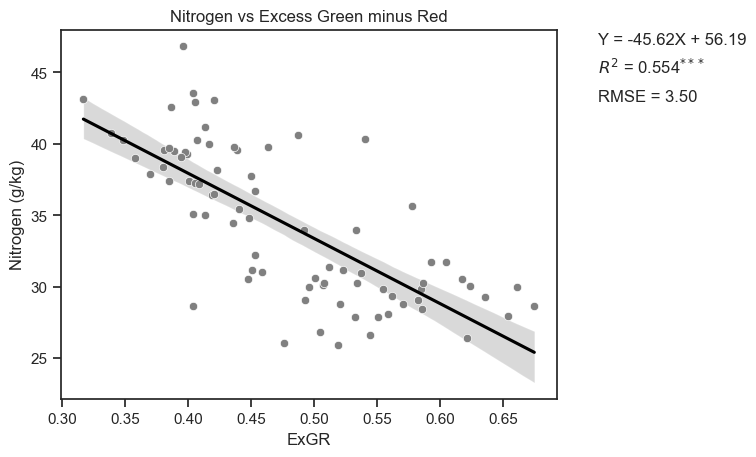

In [16]:
## Nitrogen vs EXGR
summary = stats.linregress(Harvest["EXGR_Avg_Vegetation"], Harvest["Nitrogen_GKG"])
Correlation.append("Nitrogen_EXGR")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["EXGR_Avg_Vegetation"], Harvest["Nitrogen_GKG"], summary))
Slope.append(summary.slope)


sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen_GKG", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.725, 47, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.725, 45, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.725, 43, "RMSE = " + "{:.2f}".format(rmse(Harvest["EXGR_Avg_Vegetation"], Harvest["Nitrogen_GKG"], summary))) ## RMSE
ax = sns.scatterplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen_GKG", data = Harvest, color = "Grey")
ax.set(xlabel = "ExGR", ylabel = "Nitrogen (g/kg)",
#       xlim = (0.33, 0.72), ylim = (0,5),
       title = "Nitrogen vs Excess Green minus Red")


plt.savefig(graph_out + "Nitrogen_EXGR_GKG", bbox_inches = "tight", dpi = 300)


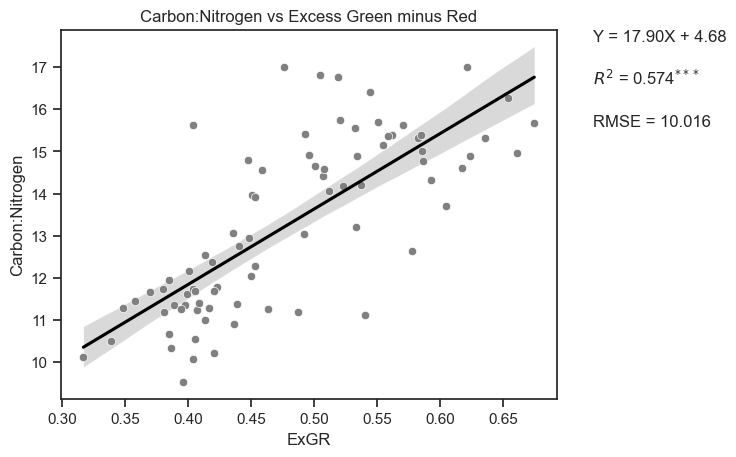

In [17]:
## Carbon:Nitrogen vs EXGR
summary = stats.linregress(Harvest["EXGR_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
Correlation.append("CN_EXGR")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["EXGR_Avg_Vegetation"], Harvest["Carbon_Nitrogen"], summary))
Slope.append(summary.slope)


sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.721, 17.6, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.721, 16.6, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.721, 15.6, "RMSE = " + "{:.3f}".format(rmse(Harvest["EXGR_Avg_Vegetation"], Harvest["Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, color = "Grey")
ax.set(xlabel = "ExGR", ylabel = "Carbon:Nitrogen",
#       xlim = (0.33, 0.72), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Excess Green minus Red")



plt.savefig(graph_out + "CN_EXGR_C_updated", bbox_inches = "tight", dpi = 300)


The graphs are now updated.